# Check Emotion Labeled Datset

The main objective of this notebook is to show the analysis about the emotion labeled dataset

In [1]:
import os
import pandas as pd
from pathlib import Path

In [2]:
dataset_path = Path('../datasets/emotion_recognition/train.csv').resolve()

In [3]:
dataset = pd.read_csv(dataset_path)

In [4]:
dataset.head()

,date,id,label,text,user
0,2019-10-13 20:57:07,1183486848091459586,sadness,@kalemnokta1 Amin,fidan_duman
1,2019-10-13 20:57:09,1183486858724102149,sadness,Seems like a big night in #Syria #Manbij. Umma...,PakSheikh47
2,2019-10-13 20:57:10,1183486862939303940,sadness,swear I feel like I’ve put all the weight I lo...,jessthorburn
3,2019-10-13 20:57:13,1183486872963731457,sadness,"In the beginning of this year, i intended i wa...",heavenart19
4,2019-10-13 20:57:13,1183486874117197831,sadness,Y’all gotta stop sabotaging your success. It’s...,KADYTheGREAT


In [5]:
import seaborn as sns

## Label count

Check the count of each label

[Text(0, 0.5, 'Número de tweets'), Text(0.5, 0, 'Rótulo')]

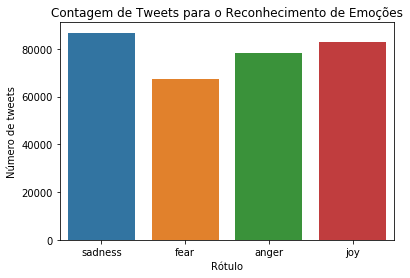

In [6]:
ax = sns.countplot(x='label', data=dataset)
ax.set_title('Contagem de Tweets para o Reconhecimento de Emoções')
ax.set(xlabel='Rótulo', ylabel='Número de tweets')

In [9]:
print(len(dataset[dataset.label == 'sadness']))
print(len(dataset[dataset.label == 'fear']))
print(len(dataset[dataset.label == 'anger']))
print(len(dataset[dataset.label == 'joy']))

86790
67389
78116
82913


## Stopwords

Check the most used words

In [11]:
from collections import defaultdict

In [14]:
word_dict = defaultdict(int)

def count_words(text):
    words = text.lower().split(" ")
    for word in words:
        word_dict[word] += 1

dataset.text.apply(count_words)

dict(sorted(word_dict.items(), key=lambda x: x[1], reverse=True))

{'': 188848,
 'the': 74027,
 'to': 65365,
 'i': 64802,
 'and': 47954,
 'a': 47879,
 'you': 36909,
 'of': 33187,
 'is': 31151,
 'my': 30686,
 'in': 28042,
 'for': 27335,
 'this': 23542,
 'it': 20578,
 'that': 20406,
 'on': 18387,
 'so': 17290,
 'be': 16508,
 'me': 16290,
 'with': 15002,
 'have': 14447,
 'are': 13804,
 'but': 13503,
 'not': 13218,
 'your': 13152,
 'just': 12586,
 'like': 11650,
 'was': 11496,
 'we': 10567,
 'at': 10434,
 'all': 10041,
 'they': 9688,
 'get': 9044,
 'if': 8612,
 'what': 8236,
 'when': 8099,
 'he': 7880,
 'do': 7653,
 'i’m': 7625,
 'will': 7560,
 'can': 7521,
 'from': 7486,
 '&amp;': 7329,
 'no': 7254,
 'one': 7252,
 'out': 7216,
 'about': 7183,
 'up': 7067,
 'as': 7031,
 'how': 6947,
 'or': 5929,
 'know': 5672,
 'our': 5488,
 'people': 5365,
 "i'm": 5364,
 'who': 5328,
 'now': 5211,
 'see': 5164,
 'love': 5121,
 'time': 5033,
 'really': 4994,
 'an': 4971,
 'good': 4898,
 'by': 4892,
 'go': 4886,
 'his': 4828,
 'has': 4713,
 'more': 4696,
 'been': 4686,
 'g

## Preprocess

Preprocess the text before proceding with the analysis

In [10]:
# Add project path to the PYTHONPATH

import os
import sys
from pathlib import Path

sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

In [11]:
from nlp.utils import preprocess

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmohashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
dataset['cleaned_text'] = preprocess(dataset.text)

Time to clean up: 72.07 sec


## Text length

Check the length of the tweets

In [11]:
# Tweets with the new char count

len(dataset[dataset.text.apply(lambda text: len(text)) > 140])

52389

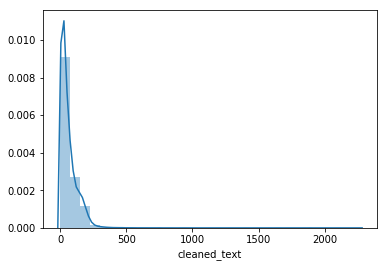

In [12]:
sns.distplot(dataset.cleaned_text.apply(lambda text: len(text)), bins=30)

## Word count

Check the word count

In [13]:
dataset.cleaned_text.apply(lambda text: len(text.split())).max()

171

[Text(0, 0.5, 'Porcentagem de tweets'), Text(0.5, 0, 'Número de palavras')]

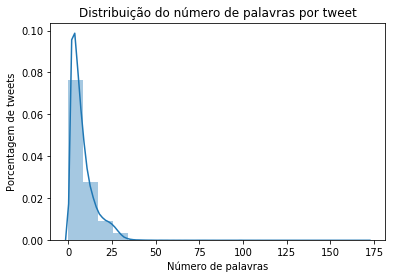

In [16]:
ax = sns.distplot(dataset.cleaned_text.apply(lambda text: len(text.split())), bins=20)
ax.set_title('Distribuição do número de palavras por tweet')
ax.set(xlabel='Número de palavras', ylabel='Porcentagem de tweets')

In [59]:
len(dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) > 30])

8726

In [60]:
dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) == 30].iloc[0].cleaned_text

'interested link bio want discount code mutant_superman go check save money guys :thumbs_up_medium light_skin_tone: :flexed_biceps_medium light_skin_tone: :money mouth_face: er life :thumbs_up_medium light_skin_tone: :folded_hands_medium light_skin_tone: whateverittakes neverstopchasingyourgoals fuckshitup percentnutrition savemoney nobullshit'

In [61]:
filtered_dataset = dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) <= 30]

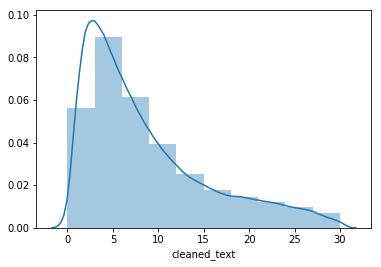

In [62]:
sns.distplot(filtered_dataset.cleaned_text.apply(lambda text: len(text.split())), bins=10)

In [74]:
len(dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) < 3])

37260

In [73]:
dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) == 3].iloc[0].cleaned_text

'eminem not sale'

In [76]:
filtered_dataset = dataset[dataset.cleaned_text.apply(lambda text: len(text.split())) >= 3]

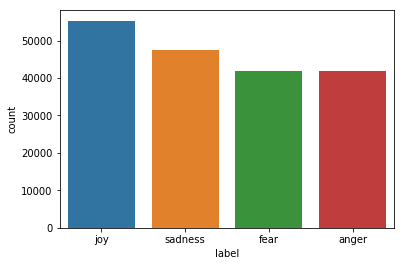

In [78]:
sns.countplot(x='label', data=filtered_dataset)